Загрузка данных

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/amazon_market_data.csv')

In [ ]:
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


Приведение столбцов к стилю camel_case

In [ ]:
# Функция для преобразования строк в стиль camelCase
def to_camel_case(s):
    parts = s.split()
    return parts[0].lower() + ''.join(word.capitalize() for word in parts[1:])

# Применим преобразование ко всем столбцам
df.columns = [to_camel_case(col) for col in df.columns]

# Отобразим результат
print(df.head())


  orderdate  rowid         orderid        shipmode customerid      segment  \
0  01-01-20    849  CA-2017-107503  Standard Class   GA-14725     Consumer   
1  01-01-20   4010  CA-2017-144463  Standard Class   SC-20725     Consumer   
2  01-01-20   6683  CA-2017-154466     First Class   DP-13390  Home Office   
3  01-01-20   8070  CA-2017-151750  Standard Class   JM-15250     Consumer   
4  01-01-20   8071  CA-2017-151750  Standard Class   JM-15250     Consumer   

         country         city       state  postalcode   region  \
0  United States       Lorain        Ohio       44052     East   
1  United States  Los Angeles  California       90036     West   
2  United States     Franklin   Wisconsin       53132  Central   
3  United States   Huntsville       Texas       77340  Central   
4  United States   Huntsville       Texas       77340  Central   

         productid         category sub-category  \
0  FUR-FU-10003878        Furniture  Furnishings   
1  FUR-FU-10001215        Furn

Приведение типов данных

In [ ]:
# Преобразуем колонку orderdate в формат datetime
df['orderdate'] = pd.to_datetime(df['orderdate'], format='%d-%m-%y')

# Проверим тип данных и отобразим первые строки
print(df.dtypes)
print(df.head())

orderdate       datetime64[ns]
rowid                    int64
orderid                 object
shipmode                object
customerid              object
segment                 object
country                 object
city                    object
state                   object
postalcode               int64
region                  object
productid               object
category                object
sub-category            object
productname             object
sales                  float64
quantity                 int64
discount               float64
profit                 float64
dtype: object
   orderdate  rowid         orderid        shipmode customerid      segment  \
0 2020-01-01    849  CA-2017-107503  Standard Class   GA-14725     Consumer   
1 2020-01-01   4010  CA-2017-144463  Standard Class   SC-20725     Consumer   
2 2020-01-01   6683  CA-2017-154466     First Class   DP-13390  Home Office   
3 2020-01-01   8070  CA-2017-151750  Standard Class   JM-15250     Consumer   
4 

Поиск дублей и пропусков в данных

In [ ]:
# Поиск дубликатов
duplicates = df[df.duplicated()]
print("Дубликаты в данных:")
print(duplicates)

# Поиск пропусков (NaN)
missing_values = df.isnull().sum()
print("\nКоличество пропусков в каждом столбце:")
print(missing_values)

# Строки с пропусками
rows_with_missing = df[df.isnull().any(axis=1)]
print("\nСтроки с пропущенными значениями:")
print(rows_with_missing)

Дубликаты в данных:
Empty DataFrame
Columns: [orderdate, rowid, orderid, shipmode, customerid, segment, country, city, state, postalcode, region, productid, category, sub-category, productname, sales, quantity, discount, profit]
Index: []

Количество пропусков в каждом столбце:
orderdate       0
rowid           0
orderid         0
shipmode        0
customerid      0
segment         0
country         0
city            0
state           0
postalcode      0
region          0
productid       0
category        0
sub-category    0
productname     0
sales           0
quantity        0
discount        0
profit          0
dtype: int64

Строки с пропущенными значениями:
Empty DataFrame
Columns: [orderdate, rowid, orderid, shipmode, customerid, segment, country, city, state, postalcode, region, productid, category, sub-category, productname, sales, quantity, discount, profit]
Index: []


Исследовательский анализ данных

In [ ]:
df

,orderdate,rowid,orderid,shipmode,customerid,segment,country,city,state,postalcode,region,productid,category,sub-category,productname,sales,quantity,discount,profit
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-12-30,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,2020-12-30,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,2020-12-30,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,2020-12-30,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


In [ ]:
# сколько уникальных заказов?
# Посчитаем количество уникальных заказов
unique_orders = df['orderid'].nunique()
print(f"Количество уникальных заказов: {unique_orders}")


Количество уникальных заказов: 1687


In [ ]:
# сколько уникальных клиентов?
# Посчитаем количество уникальных клиентов
unique_customers = df['customerid'].nunique()
print(f"Количество уникальных клиентов: {unique_customers}")


Количество уникальных клиентов: 693


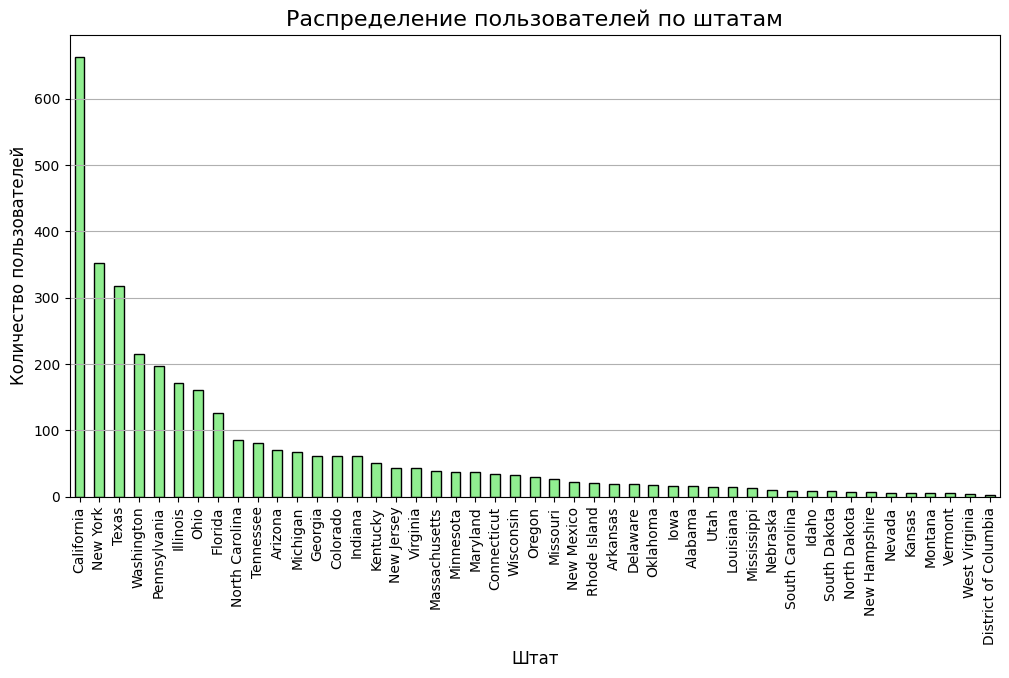

In [ ]:
# изучить локацию пользователей (визуализировать)
# Посмотрим распределение пользователей по штатам
state_counts = df['state'].value_counts()

# Визуализируем данные с помощью столбчатой диаграммы
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Распределение пользователей по штатам', fontsize=16)
plt.xlabel('Штат', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')

# Отобразим график
plt.show()



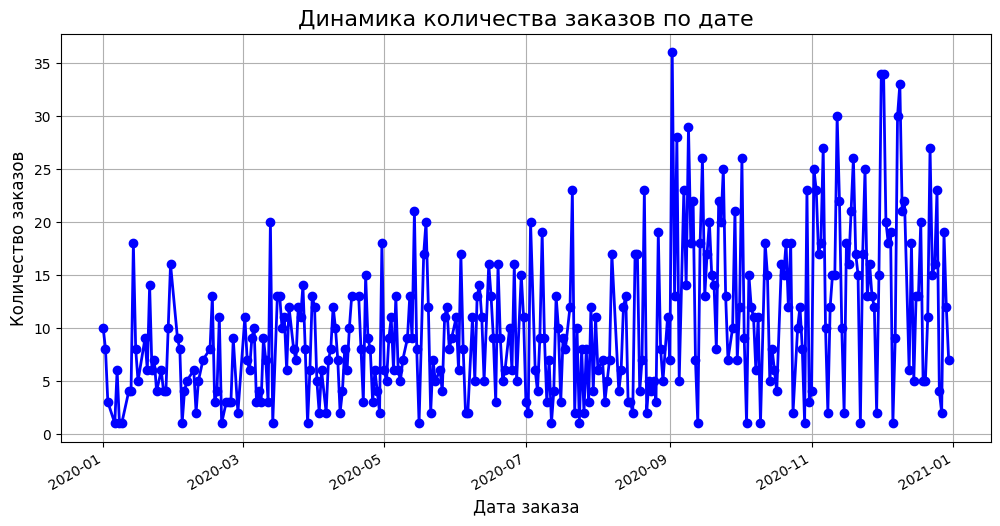

In [ ]:
# изучить динамику кол-ва заказов по дате заказов
# Группируем данные по дате и считаем количество заказов на каждую дату
orders_by_date = df.groupby(df['orderdate']).size()

# Визуализируем динамику количества заказов по дате
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
orders_by_date.plot(kind='line', marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Динамика количества заказов по дате', fontsize=16)
plt.xlabel('Дата заказа', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.grid(True)

# Отобразим график
plt.show()

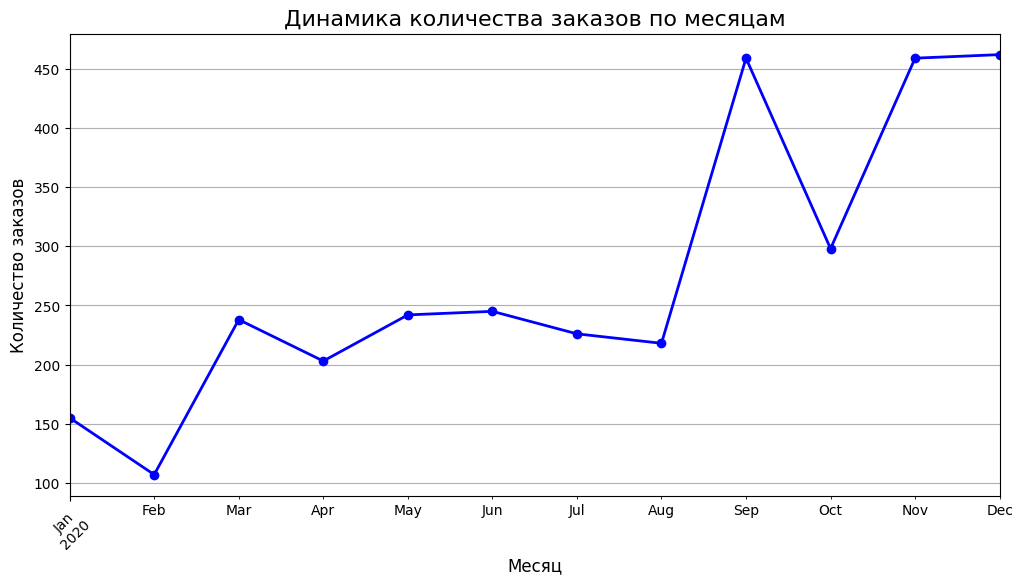

In [ ]:
# изучить динамику кол-ва заказов по дате заказов
# Сгруппируем данные по месяцам для более наглядного отображения
orders_by_month = df['orderdate'].dt.to_period('M').value_counts().sort_index()

# Визуализируем данные
plt.figure(figsize=(12, 6))
orders_by_month.plot(kind='line', marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Динамика количества заказов по месяцам', fontsize=16)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Отобразим график
plt.show()


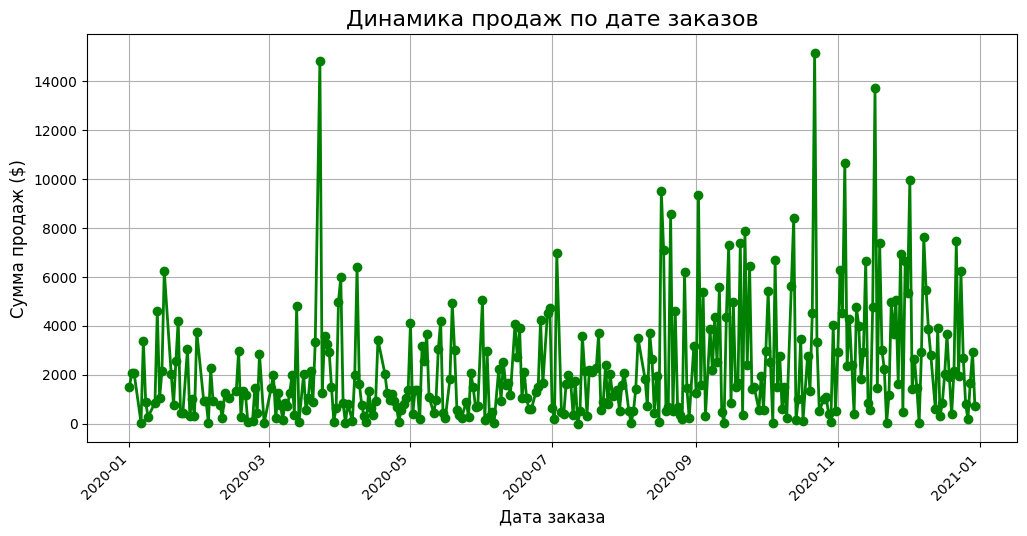

In [ ]:
# изучить динамику продаж по дате заказов

# Группируем данные по дате и суммируем продажи на каждую дату
sales_by_date = df.groupby(df['orderdate'])['sales'].sum()

# Визуализируем динамику продаж по дате
plt.figure(figsize=(12, 6))
sales_by_date.plot(kind='line', marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Динамика продаж по дате заказов', fontsize=16)
plt.xlabel('Дата заказа', fontsize=12)
plt.ylabel('Сумма продаж ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Отобразим график
plt.show()

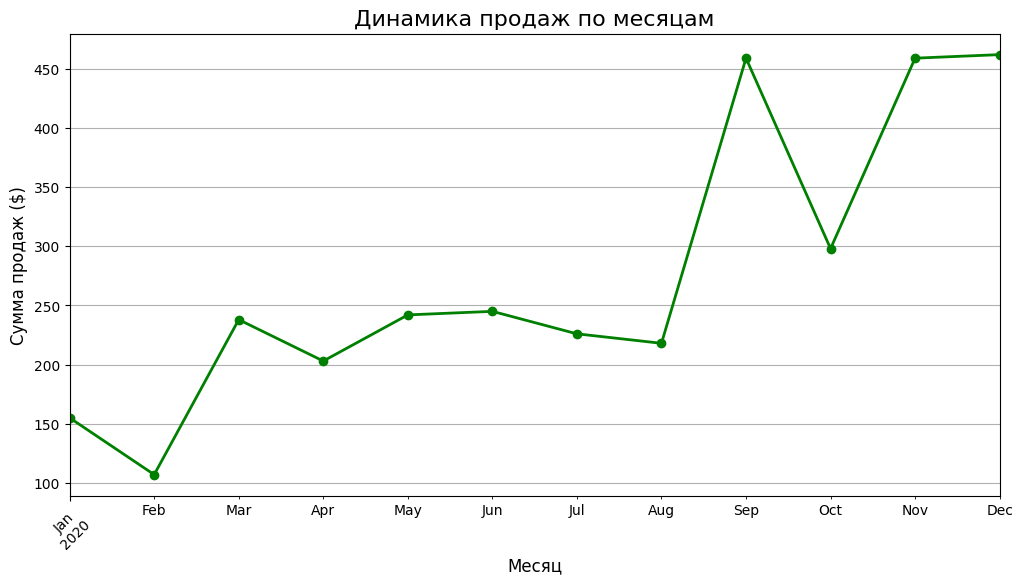

In [ ]:
# изучить динамику продаж по дате заказов
# Сгруппируем данные по месяцам для более наглядного отображения
sales_by_month = df['orderdate'].dt.to_period('M').value_counts().sort_index()

# Визуализируем данные
plt.figure(figsize=(12, 6))
sales_by_month.plot(kind='line', marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Динамика продаж по месяцам', fontsize=16)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Сумма продаж ($)', fontsize=12)
plt.xticks(rotation=45)  # Поворот меток на оси X для лучшего чтения
plt.grid(True)

# Отобразим график
plt.show()


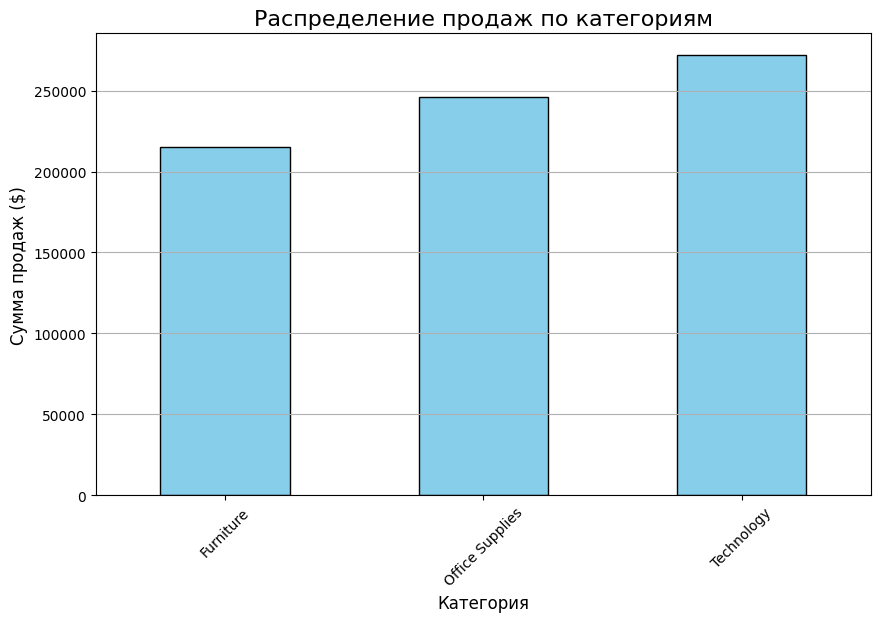

In [ ]:
# изучить распределение продаж по категориям заказов
# Посмотрим распределение продаж по категориям
sales_by_category = df.groupby('category')['sales'].sum()

# Визуализируем данные с помощью столбчатой диаграммы
plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Распределение продаж по категориям', fontsize=16)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Сумма продаж ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Отобразим график
plt.show()


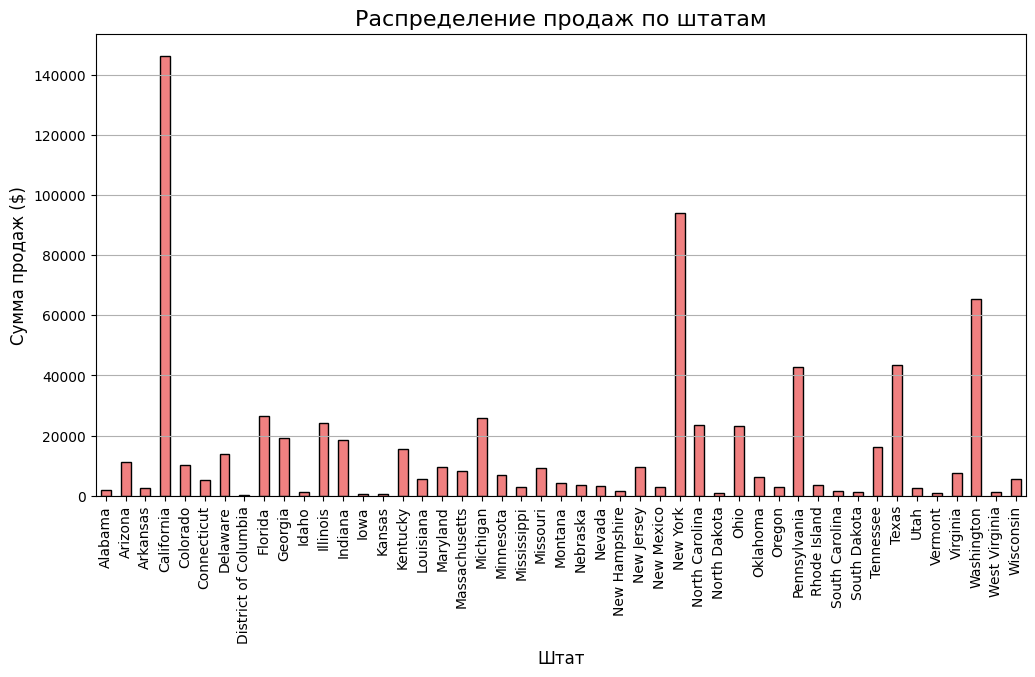

In [ ]:
# изучить распределение продаж по городам (штатам)
# Посмотрим распределение продаж по штатам
sales_by_state = df.groupby('state')['sales'].sum()

# Визуализируем данные с помощью столбчатой диаграммы
plt.figure(figsize=(12, 6))
sales_by_state.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Распределение продаж по штатам', fontsize=16)
plt.xlabel('Штат', fontsize=12)
plt.ylabel('Сумма продаж ($)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')

# Отобразим график
plt.show()



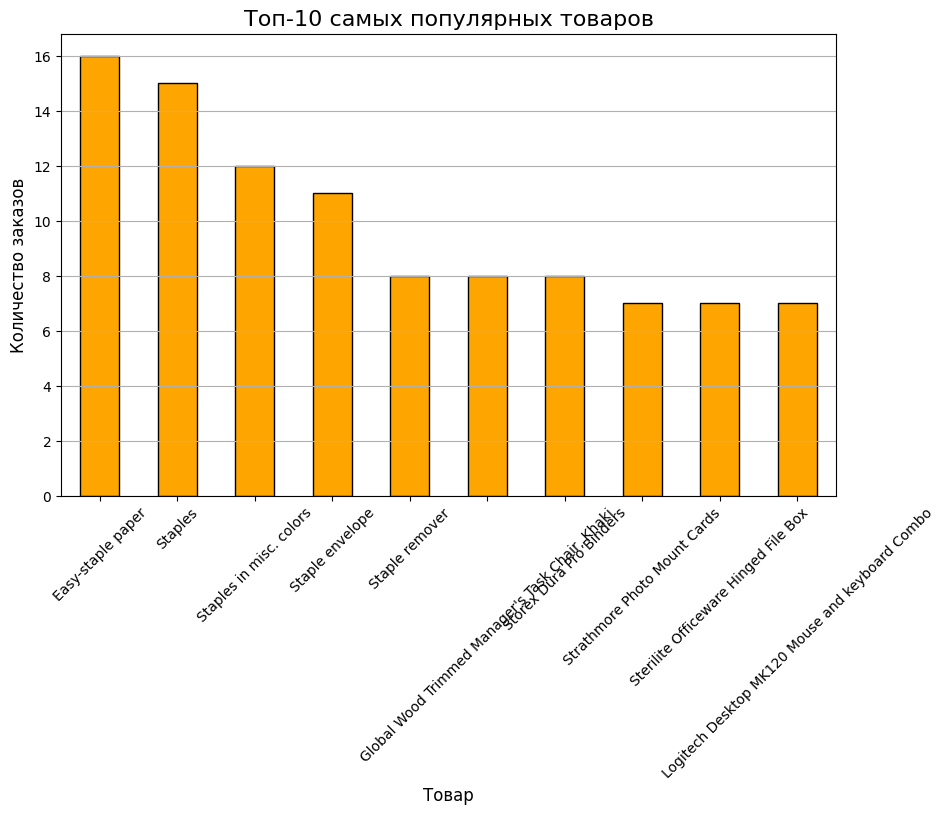

productname
Easy-staple paper                                  16
Staples                                            15
Staples in misc. colors                            12
Staple envelope                                    11
Staple remover                                      8
Global Wood Trimmed Manager's Task Chair, Khaki     8
Storex Dura Pro Binders                             8
Strathmore Photo Mount Cards                        7
Sterilite Officeware Hinged File Box                7
Logitech Desktop MK120 Mouse and keyboard Combo     7
Name: count, dtype: int64


In [ ]:
# Найдем самые популярные товары по количеству заказов (productname)
popular_products = df['productname'].value_counts().head(10)

# Визуализируем данные
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
popular_products.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Топ-10 самых популярных товаров', fontsize=16)
plt.xlabel('Товар', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Отобразим график
plt.show()


# Отобразим результат
print(popular_products)


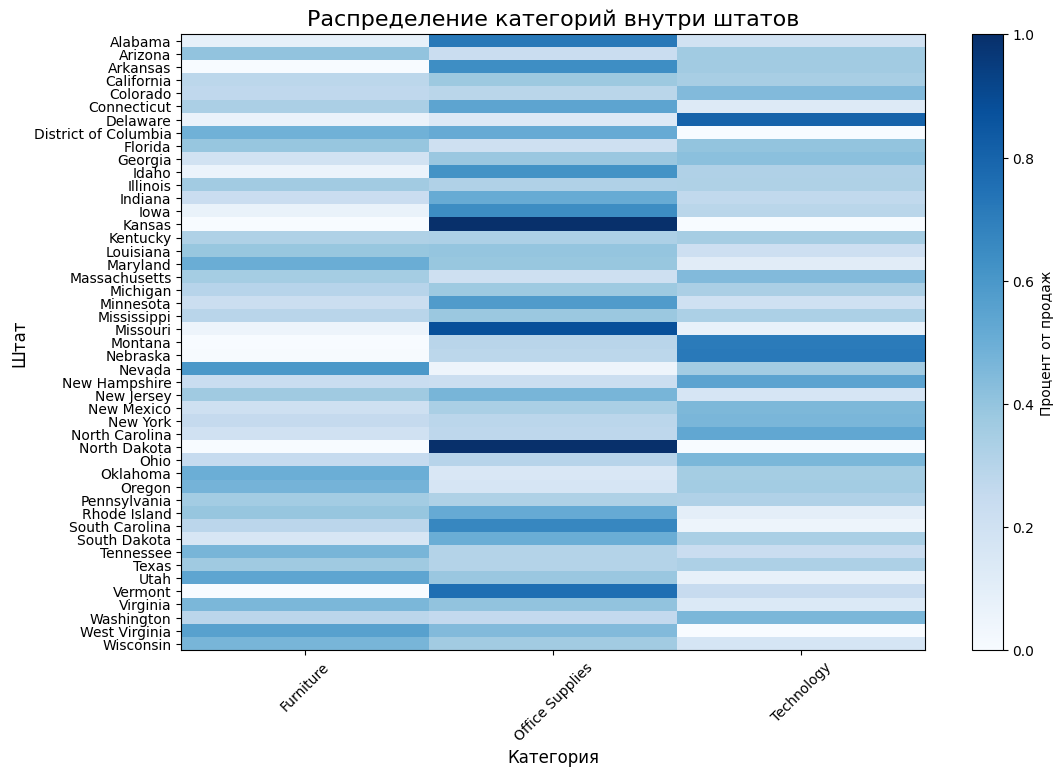

In [ ]:
# изучить распределение категорий внутри городов (штатам)
# Построим сводную таблицу для распределения продаж по категориям и штатам
category_state_distribution = pd.crosstab(df['state'], df['category'], values=df['sales'], aggfunc='sum', normalize='index')

# Визуализируем данные с помощью тепловой карты
plt.figure(figsize=(12, 8))
plt.imshow(category_state_distribution, cmap='Blues', aspect='auto')
plt.title('Распределение категорий внутри штатов', fontsize=16)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Штат', fontsize=12)
plt.xticks(ticks=range(len(category_state_distribution.columns)), labels=category_state_distribution.columns, rotation=45)
plt.yticks(ticks=range(len(category_state_distribution.index)), labels=category_state_distribution.index)
plt.colorbar(label='Процент от продаж')

# Отобразим график
plt.show()


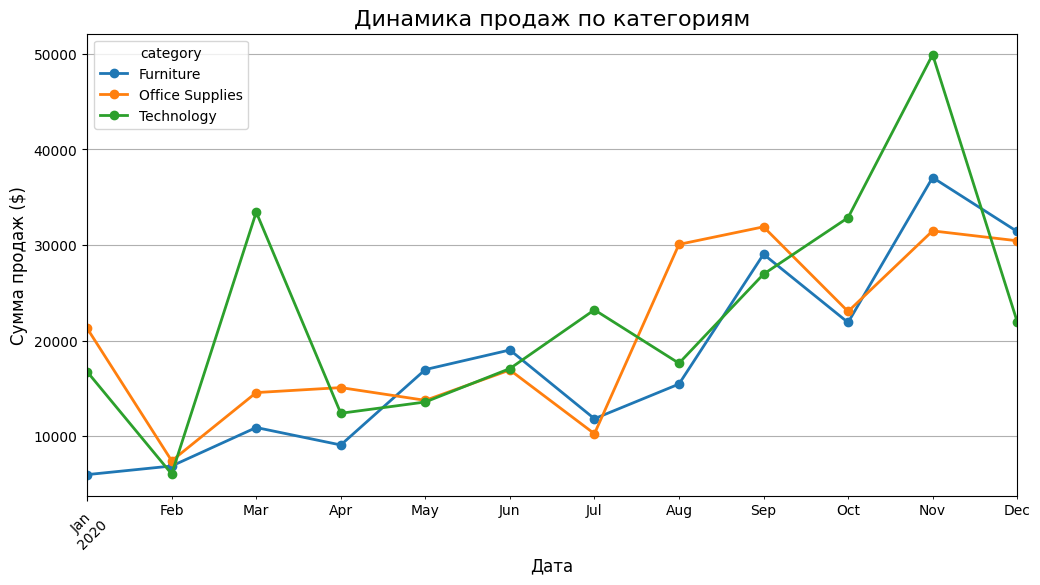

In [ ]:
# изучить динамику продаж внутри категорий
# Группируем данные по дате заказа и категории, затем суммируем продажи
df['orderdate'] = pd.to_datetime(df['orderdate'], format='%d-%m-%y')
sales_by_category_date = df.groupby([df['orderdate'].dt.to_period('M'), 'category'])['sales'].sum().unstack()

# Визуализируем данные
sales_by_category_date.plot(kind='line', marker='o', linewidth=2, figsize=(12, 6))
plt.title('Динамика продаж по категориям', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Сумма продаж ($)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)

# Отобразим график
plt.show()


Выводы


В результате проведения комплексного анализа показателей американской компании Amazon, являющейся крупнейшей в мире на рынках платформ электронной коммерции и публично-облачных вычислений по выручке и рыночной капитализации, установлено следующее:

1.	В исследуемом массиве данных содержится 1687 уникальных заказов - общее количество транзакций, отражающее активность пользователей за анализируемый период.

2.	Количество уникальных клиентов составляет 693.

3.	Анализ локации пользователей демонстрирует высокую концентрацию продаж Amazon преимущественно в штатах Калифорния и Нью-Йорк, приносящих компании значительную долю выручки. Это может свидетельствовать о большом количестве заказов в экономически активных регионах страны. При этом у компании также есть филиалы за пределами США, в том числе в Австралии, Бразилии, Канаде, Великобритании, Германии, Японии, Франции, Италии, Польше, Испании, Индии, Турции, ОАЭ и Китае. По доле в выручке ключевыми странами для Amazon являются США, Германия, Великобритания и Япония.

4.	Общее количество заказов Amazon демонстрирует стабильный рост в течение анализируемого периода, свидетельствующий о положительной динамике спроса на товары. Основанная Джеффом Безосом 5 июля 1994 года как интернет-магазин по продаже книг, в результате диверсификации Amazon в настоящее время занимается реализацией видео, MP3, аудиокниг, программного обеспечения, видеоигр, электроники, одежды, мебели, продуктов питания, игрушек и ювелирных изделий. Компания также владеет издательским подразделением Amazon Publishing, киностудией Amazon Studios, производит линии бытовой электроники, включая электронные книги Kindle, планшеты Amazon Fire, Fire TV и смарт-динамик Echo, а также является крупнейшим в мире поставщиком услуг в моделях IaaS и PaaS (Amazon Web Services).

5.	Изучение ежемесячного количества заказов приводит к выводу о положительной тенденции к росту объема продаж в период с сентября по декабрь. Снижение деловой активности наблюдается в начале года - в январе и феврале фиксируются минимальные показатели.

6.	Относительно динамики продаж по категориям исследование демонстрирует стабильный рост в течение анализируемого периода в части продаж в категориях Office Supplies и Technology, что может свидетельствовать о растущем спросе на офисные товары и технологии. Категория Furniture показывает менее стабильный рост с пиковыми всплесками в определенные периоды, вероятно, в зависимости от сезонного спроса. Наиболее популярные категории товаров включают Office Supplies и Furniture. Эти категории генерируют наибольшую выручку, что может указывать на большой спрос среди офисных клиентов и корпоративных заказов.

7.	В разных штатах наблюдаются отличия в предпочтениях по категориям товаров. Например, в Калифорнии Technology составляет большую долю продаж, в то время как в других штатах популярность категории Furniture выше.

8.	Самые востребованные товары по количеству заказов включают офисные принадлежности и мебель для офиса, что указывает на вероятность высокой концентрации ключевых потребителей в сегменте корпоративного бизнеса, нуждающихся в регулярных заказах офисных принадлежностей.

9.	Продажи в таких штатах, как Техас и Калифорния, составляют значительную часть выручки компании Amazon, что подчеркивает важность таргетирования маркетинговых усилий на указанные регионы. Этот список отражает ключевые закономерности, выявленные в ходе анализа данных, и может использоваться для принятия стратегических решений по маркетингу, продажам и управлению продуктами.

10.	Анализ динамики продаж внутри категорий демонстрирует, в целом, равномерную зависимость объема продаж во временных интервалах, при этом в марте и ноябре отмечается существенный прирост суммарных продаж в категории Technology, пиковые показатели в категории Furniture наблюдаются в сентябре и ноябре, а в категории Office supplies – в августе и сентябре. Минимальный объем продаж по исследуемым категориям фиксируется в феврале, что свидетельствует о спаде деловой активности потребителей.
